In [2]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 579.8/579.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.2 kB/s eta 0:00:0000:0100:02m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 36.6 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


/var/folders/jg/rd8p6smj1vd70l1b160q9j9m0000gn/T/ipykernel_22832/676790551.py:27: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, insat_interpolated, cmap='jet')


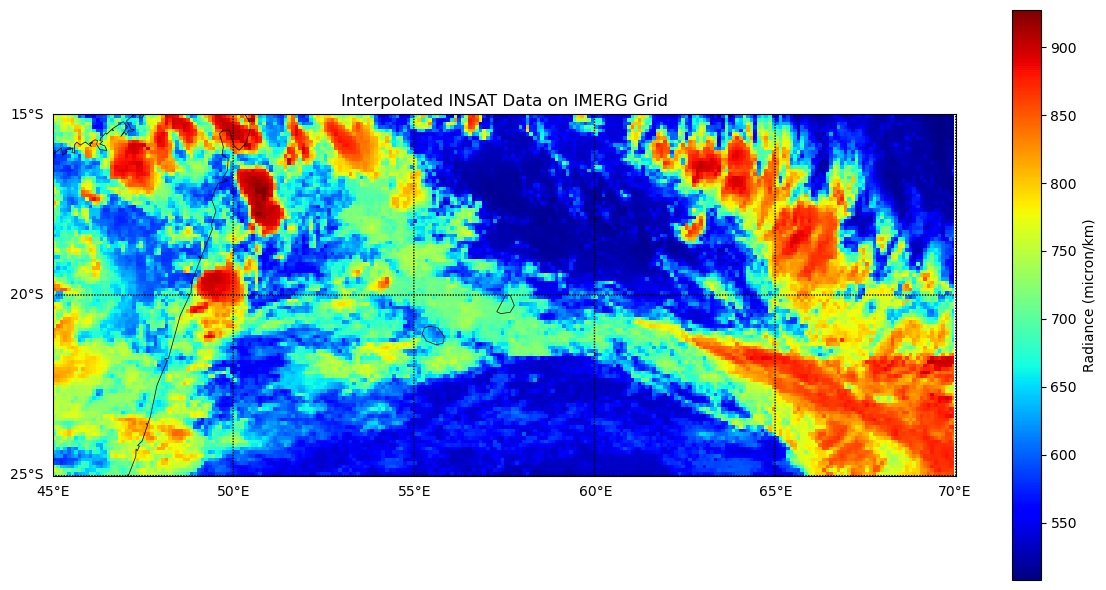

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap

# Load CSV files into pandas DataFrames
insat_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/INSAT 31:12:23/CSV Files/INSAT_0015.csv")
imerg_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/IMERG.csv")

# Define the grid representing the IMERG grid
imerg_lon = imerg_data['lon'].values
imerg_lat = imerg_data['lat'].values
imerg_grid_lon, imerg_grid_lat = np.meshgrid(imerg_lon, imerg_lat)

# Interpolate INSAT data onto IMERG grid
insat_interpolated = griddata((insat_data['longitude'].values, insat_data['latitude'].values), insat_data['IMG_TIR1'].values, (imerg_grid_lon, imerg_grid_lat), method='linear')

# Plotting on basemap
m = Basemap(projection='cyl', llcrnrlon=45, llcrnrlat=-25, urcrnrlon=70, urcrnrlat=-15, resolution='l')
x, y = m(imerg_grid_lon, imerg_grid_lat)

fig = plt.figure(figsize=(12, 6))

# Plot interpolated INSAT data on IMERG grid
m.drawcoastlines(linewidth=0.5)
m.pcolormesh(x, y, insat_interpolated, cmap='jet')
plt.title('Interpolated INSAT Data on IMERG Grid')
plt.colorbar(label='Radiance (micron/km)')

# Draw latitude and longitude grid lines
m.drawparallels(np.arange(-90., 91., 5.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0,0,0,1], fontsize=10)


plt.tight_layout()
plt.show()


Original INSAT Data - Min: 505 Max: 934
Interpolated Data - Min: 507.7929936305732 Max: 927.3388502703299
IMERG Data - Min: 0.0 Max: 233.4172


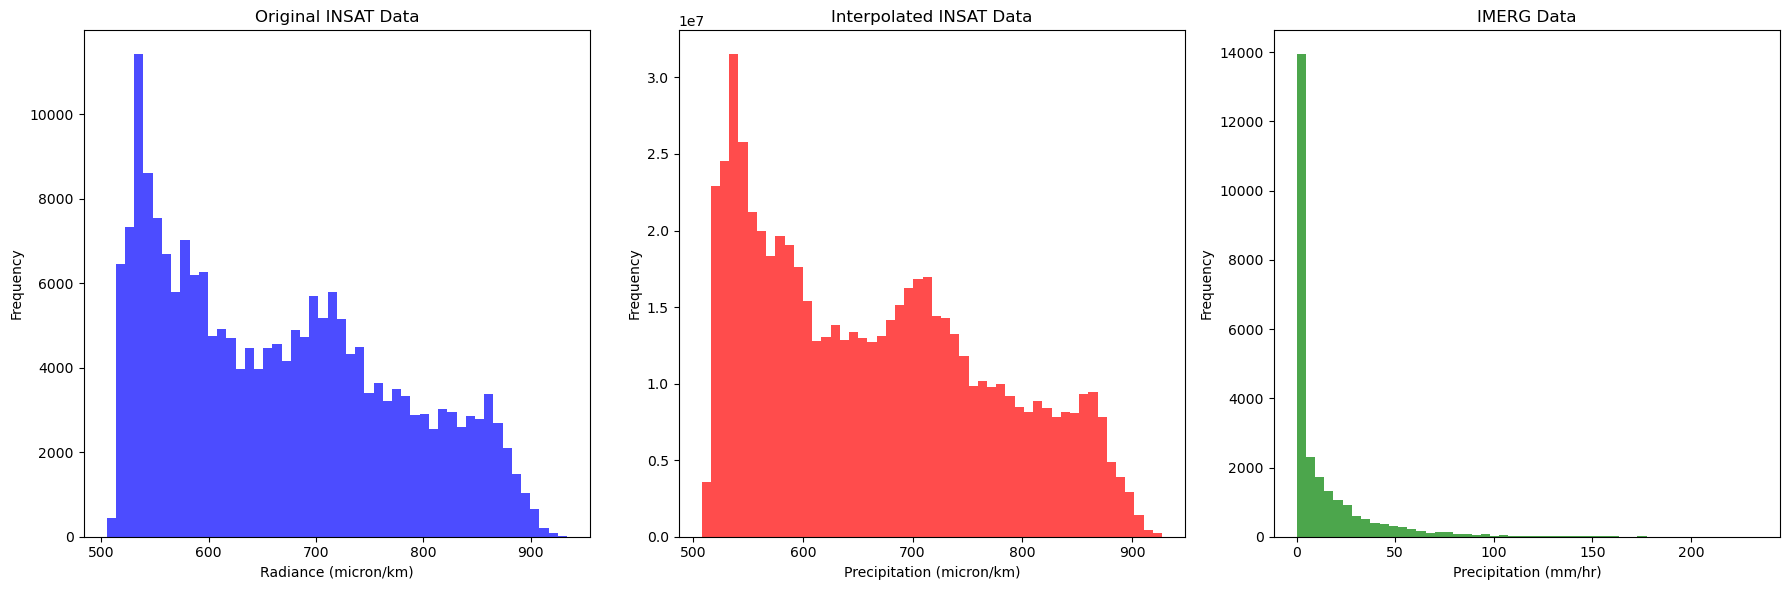

In [8]:
# Print min and max values
print("Original INSAT Data - Min:", insat_data['IMG_TIR1'].min(), "Max:", insat_data['IMG_TIR1'].max())
print("Interpolated Data - Min:", np.nanmin(insat_interpolated), "Max:", np.nanmax(insat_interpolated))
print("IMERG Data - Min:", imerg_data['precipitationCal'].min(), "Max:", imerg_data['precipitationCal'].max())


# Plot histograms for original and interpolated data
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for original INSAT data
axs[0].hist(insat_data['IMG_TIR1'].dropna(), bins=50, color='blue', alpha=0.7)
axs[0].set_title('Original INSAT Data')
axs[0].set_xlabel('Radiance (micron/km)')
axs[0].set_ylabel('Frequency')

# Histogram for interpolated INSAT data
axs[1].hist(insat_interpolated.flatten(), bins=50, color='red', alpha=0.7)
axs[1].set_title('Interpolated INSAT Data')
axs[1].set_xlabel('Precipitation (micron/km)')
axs[1].set_ylabel('Frequency')

# Histogram for IMERG data
axs[2].hist(imerg_data['precipitationCal'].dropna(), bins=50, color='green', alpha=0.7)
axs[2].set_title('IMERG Data')
axs[2].set_xlabel('Precipitation (mm/hr)')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [9]:
# Print min and max latitude and longitude for INSAT data
print("INSAT Data:")
print("Min Latitude:", insat_data['latitude'].min())
print("Max Latitude:", insat_data['latitude'].max())
print("Min Longitude:", insat_data['longitude'].min())
print("Max Longitude:", insat_data['longitude'].max())

# Print min and max latitude and longitude for IMERG data
print("\nIMERG Data:")
print("Min Latitude:", imerg_data['lat'].min())
print("Max Latitude:", imerg_data['lat'].max())
print("Min Longitude:", imerg_data['lon'].min())
print("Max Longitude:", imerg_data['lon'].max())


INSAT Data:
Min Latitude: -24.991703033447266
Max Latitude: -15.019661903381348
Min Longitude: 45.01143264770508
Max Longitude: 69.98693084716797

IMERG Data:
Min Latitude: -24.950000762939453
Max Latitude: -15.04999828338623
Min Longitude: 45.04999923706055
Max Longitude: 69.95001220703125


/var/folders/jg/rd8p6smj1vd70l1b160q9j9m0000gn/T/ipykernel_23210/437073942.py:46: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, insat_interpolated, cmap='jet')


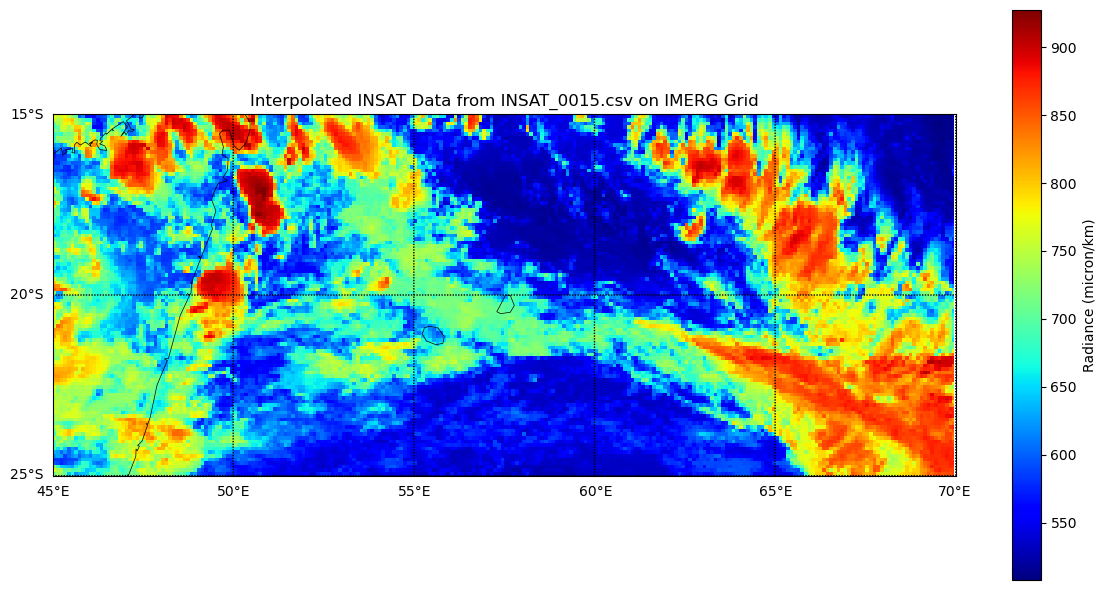

/var/folders/jg/rd8p6smj1vd70l1b160q9j9m0000gn/T/ipykernel_23210/437073942.py:46: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, insat_interpolated, cmap='jet')


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap

# Directory containing CSV files
directory = "/Users/kunalpathak9826/Desktop/ISRO/Data/INSAT 31:12:23/CSV Files/"

# Load IMERG CSV file
imerg_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/IMERG.csv")

# Get list of CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Define function to interpolate and plot data
def interpolate_and_plot(csv_file):
    # Load CSV files into pandas DataFrame
    insat_data = pd.read_csv(os.path.join(directory, csv_file))
    
    # Define the grid representing the IMERG grid
    imerg_lon = imerg_data['lon'].values
    imerg_lat = imerg_data['lat'].values
    imerg_grid_lon, imerg_grid_lat = np.meshgrid(imerg_lon, imerg_lat)
    
    # Interpolate INSAT data onto IMERG grid
    insat_interpolated = griddata(
        (insat_data['longitude'].values, insat_data['latitude'].values), 
        insat_data['IMG_TIR1'].values, 
        (imerg_grid_lon, imerg_grid_lat), 
        method='linear'
    )
    
    # Basemap settings
    m = Basemap(projection='cyl', llcrnrlon=45, llcrnrlat=-25, urcrnrlon=70, urcrnrlat=-15, resolution='l')
    
    # Plotting on basemap
    fig = plt.figure(figsize=(12, 6))
    m.drawcoastlines(linewidth=0.5)
    
    # Convert grid to map projection coordinates
    x, y = m(imerg_grid_lon, imerg_grid_lat)
    
    # Plot interpolated INSAT data
    m.pcolormesh(x, y, insat_interpolated, cmap='jet')
    plt.title(f'Interpolated INSAT Data from {csv_file} on IMERG Grid')
    plt.colorbar(label='Radiance (micron/km)')
    m.drawparallels(np.arange(-90., 91., 5.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 5.), labels=[0,0,0,1], fontsize=10)
    plt.tight_layout()
    plt.show()

# Plot for each CSV file
for csv_file in csv_files:
    interpolate_and_plot(csv_file)


In [2]:
pip install basemap-data-hires


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 3.3 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


/var/folders/jg/rd8p6smj1vd70l1b160q9j9m0000gn/T/ipykernel_23541/4259618664.py:27: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, insat_interpolated, cmap='jet')


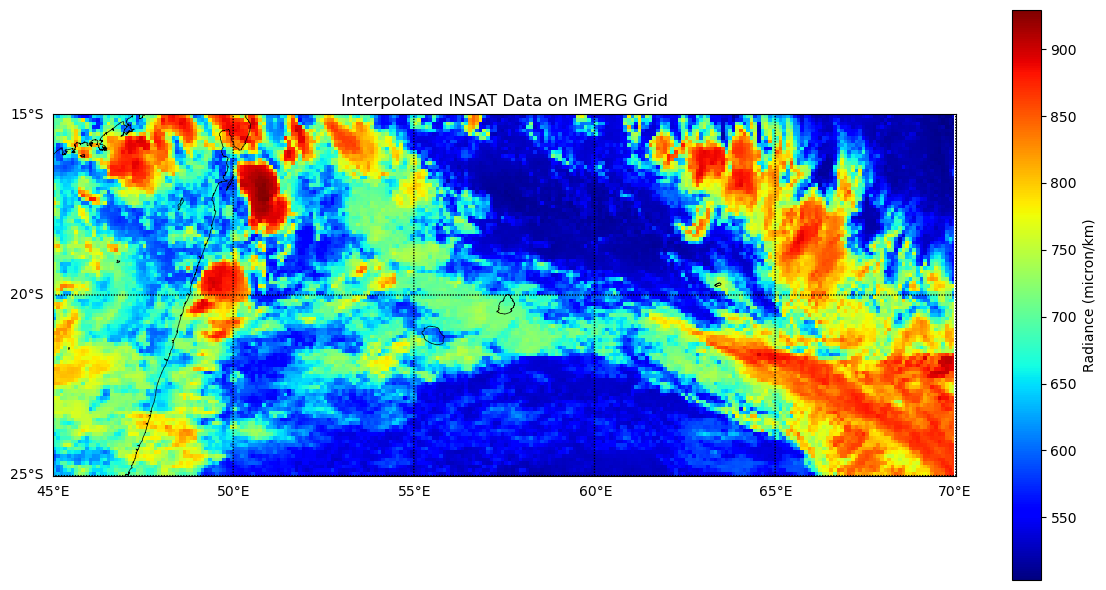

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap

# Load CSV files into pandas DataFrames
insat_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/INSAT 31:12:23/CSV Files/INSAT_0045.csv")
imerg_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/IMERG.csv")

# Define the grid representing the IMERG grid
imerg_lon = imerg_data['lon'].values
imerg_lat = imerg_data['lat'].values
imerg_grid_lon, imerg_grid_lat = np.meshgrid(imerg_lon, imerg_lat)

# Interpolate INSAT data onto IMERG grid
insat_interpolated = griddata((insat_data['longitude'].values, insat_data['latitude'].values), insat_data['IMG_TIR1'].values, (imerg_grid_lon, imerg_grid_lat), method='linear')

# Plotting on basemap
m = Basemap(projection='cyl', llcrnrlon=45, llcrnrlat=-25, urcrnrlon=70, urcrnrlat=-15, resolution='h')  # Set resolution to 'h' for high resolution
x, y = m(imerg_grid_lon, imerg_grid_lat)

fig = plt.figure(figsize=(12, 6))

# Plot interpolated INSAT data on IMERG grid
m.drawcoastlines(linewidth=0.5)
m.pcolormesh(x, y, insat_interpolated, cmap='jet')
plt.title('Interpolated INSAT Data on IMERG Grid')
plt.colorbar(label='Radiance (micron/km)')

# Draw latitude and longitude grid lines
m.drawparallels(np.arange(-90., 91., 5.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0,0,0,1], fontsize=10)

plt.tight_layout()
plt.show()


Original INSAT Data - Min: 501 Max: 933
Interpolated Data - Min: 503.1210863729363 Max: 929.3696476604662
IMERG Data - Min: 0.0 Max: 233.4172


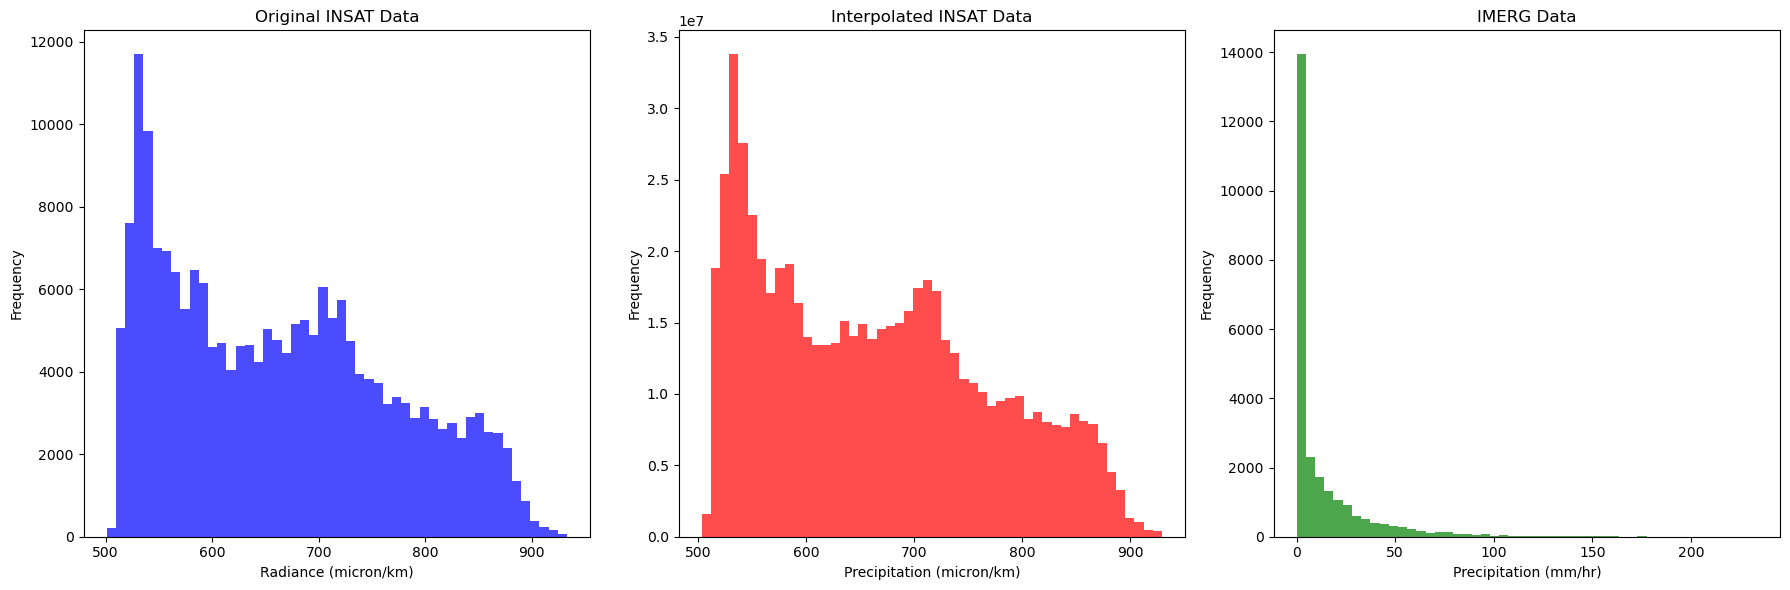

In [4]:
# Print min and max values
print("Original INSAT Data - Min:", insat_data['IMG_TIR1'].min(), "Max:", insat_data['IMG_TIR1'].max())
print("Interpolated Data - Min:", np.nanmin(insat_interpolated), "Max:", np.nanmax(insat_interpolated))
print("IMERG Data - Min:", imerg_data['precipitationCal'].min(), "Max:", imerg_data['precipitationCal'].max())


# Plot histograms for original and interpolated data
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for original INSAT data
axs[0].hist(insat_data['IMG_TIR1'].dropna(), bins=50, color='blue', alpha=0.7)
axs[0].set_title('Original INSAT Data')
axs[0].set_xlabel('Radiance (micron/km)')
axs[0].set_ylabel('Frequency')

# Histogram for interpolated INSAT data
axs[1].hist(insat_interpolated.flatten(), bins=50, color='red', alpha=0.7)
axs[1].set_title('Interpolated INSAT Data')
axs[1].set_xlabel('Precipitation (micron/km)')
axs[1].set_ylabel('Frequency')

# Histogram for IMERG data
axs[2].hist(imerg_data['precipitationCal'].dropna(), bins=50, color='green', alpha=0.7)
axs[2].set_title('IMERG Data')
axs[2].set_xlabel('Precipitation (mm/hr)')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


/var/folders/jg/rd8p6smj1vd70l1b160q9j9m0000gn/T/ipykernel_24240/1812629567.py:27: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, insat_interpolated, cmap='jet')


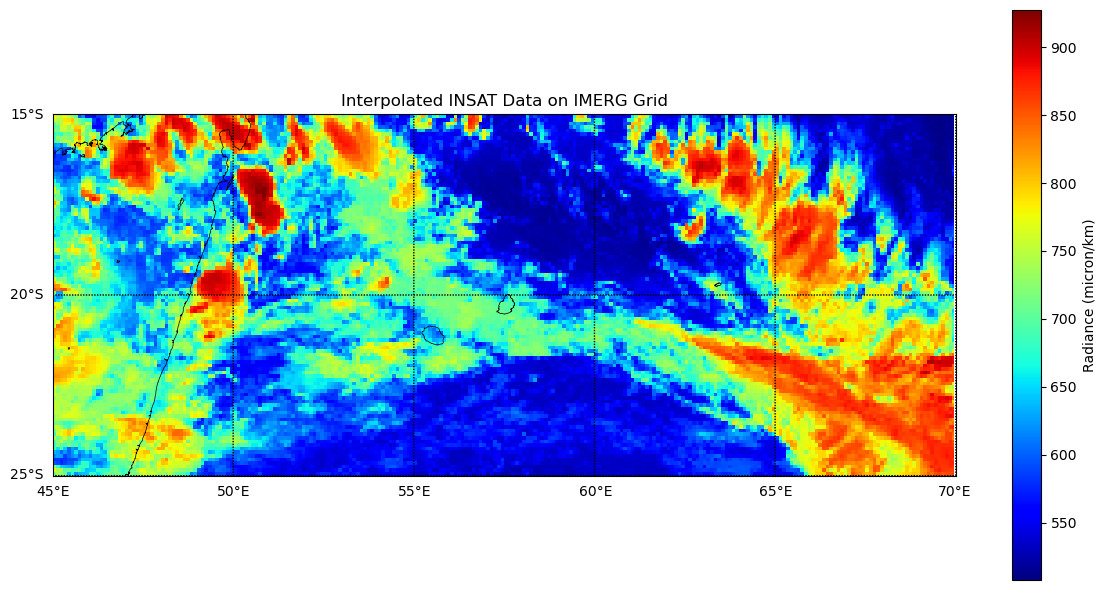

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap

# Load CSV files into pandas DataFrames
insat_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/INSAT 31:12:23/CSV Files/INSAT_0015.csv")
imerg_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/IMERG.csv")

# Define the grid representing the IMERG grid
imerg_lon = imerg_data['lon'].values
imerg_lat = imerg_data['lat'].values
imerg_grid_lon, imerg_grid_lat = np.meshgrid(imerg_lon, imerg_lat)

# Interpolate INSAT data onto IMERG grid
insat_interpolated = griddata((insat_data['longitude'].values, insat_data['latitude'].values), insat_data['IMG_TIR1'].values, (imerg_grid_lon, imerg_grid_lat), method='linear')

# Plotting on basemap
m = Basemap(projection='cyl', llcrnrlon=45, llcrnrlat=-25, urcrnrlon=70, urcrnrlat=-15, resolution='h')  # Set resolution to 'h' for high resolution
x, y = m(imerg_grid_lon, imerg_grid_lat)

fig = plt.figure(figsize=(12, 6))

# Plot interpolated INSAT data on IMERG grid
m.drawcoastlines(linewidth=0.5)
m.pcolormesh(x, y, insat_interpolated, cmap='jet')
plt.title('Interpolated INSAT Data on IMERG Grid')
plt.colorbar(label='Radiance (micron/km)')

# Draw latitude and longitude grid lines
m.drawparallels(np.arange(-90., 91., 5.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0,0,0,1], fontsize=10)

plt.tight_layout()

# Save the figure
plt.savefig('high_res_basemap.png', dpi=800)  # Save the figure with higher resolution (300 dpi)

# Show the plot
plt.show()
